# Porto Seguro's Safe Driver Prediction | Kaggle

In [1]:
# Import libraries necessary for this project
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data_raw = pd.read_csv("data/train.csv")

print "Data loaded"

Data loaded


In [2]:
# TODO: Total number of records
n_records = data_raw['id'].count()

# Number of records where accident did not happen
n_accident = data_raw[data_raw['target'] == 0]['target'].count()

# Number of records where accident happened
n_no_accident = data_raw[data_raw['target'] == 1]['target'].count()

# TODO: Percentage of individuals who had an accident
no_accident_percent = np.true_divide(n_accident, n_records) * 100

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals not claiming an accident: {}".format(n_accident)
print "Individuals claiming an accident: {}".format(n_no_accident)
print "Percentage of individuals not claiming an accident: {:.2f}%".format(no_accident_percent)

Total number of records: 595212
Individuals not claiming an accident: 573518
Individuals claiming an accident: 21694
Percentage of individuals not claiming an accident: 96.36%


In [3]:
# check how many -1 values for each column
features_raw = list(data_raw)

# ratio of missing data in each column
for feature in features_raw:
    n_column_missing = len(data_raw[data_raw[feature] == -1])
    missing_data_ratio = np.true_divide(n_column_missing, n_records)
    print feature, missing_data_ratio 

# drop features with too many missing data   
data_drop_missing = data_raw.drop(['ps_reg_03','ps_car_03_cat','ps_car_05_cat'], axis = 1)

print len(list(data_drop_missing))

id 0.0
target 0.0
ps_ind_01 0.0
ps_ind_02_cat 0.000362895909357
ps_ind_03 0.0
ps_ind_04_cat 0.000139446113318
ps_ind_05_cat 0.00975954785858
ps_ind_06_bin 0.0
ps_ind_07_bin 0.0
ps_ind_08_bin 0.0
ps_ind_09_bin 0.0
ps_ind_10_bin 0.0
ps_ind_11_bin 0.0
ps_ind_12_bin 0.0
ps_ind_13_bin 0.0
ps_ind_14 0.0
ps_ind_15 0.0
ps_ind_16_bin 0.0
ps_ind_17_bin 0.0
ps_ind_18_bin 0.0
ps_reg_01 0.0
ps_reg_02 0.0
ps_reg_03 0.181064897885
ps_car_01_cat 0.000179767881024
ps_car_02_cat 8.40036827215e-06
ps_car_03_cat 0.690898368984
ps_car_04_cat 0.0
ps_car_05_cat 0.447825312662
ps_car_06_cat 0.0
ps_car_07_cat 0.0193023662157
ps_car_08_cat 0.0
ps_car_09_cat 0.00095596190937
ps_car_10_cat 0.0
ps_car_11_cat 0.0
ps_car_11 8.40036827215e-06
ps_car_12 1.68007365443e-06
ps_car_13 0.0
ps_car_14 0.0716047391518
ps_car_15 0.0
ps_calc_01 0.0
ps_calc_02 0.0
ps_calc_03 0.0
ps_calc_04 0.0
ps_calc_05 0.0
ps_calc_06 0.0
ps_calc_07 0.0
ps_calc_08 0.0
ps_calc_09 0.0
ps_calc_10 0.0
ps_calc_11 0.0
ps_calc_12 0.0
ps_calc_13 0.0
ps

In [4]:
# remove calculated features
features_calc = [f for f in list(data_drop_missing) if ('calc' in f)]
#print features_calc

# drop calculated features  
data_no_calc = data_drop_missing.drop(features_calc, axis = 1)
print list(data_no_calc), len(list(data_no_calc))

['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15'] 36


### Correlated Matrix of Continuous Data

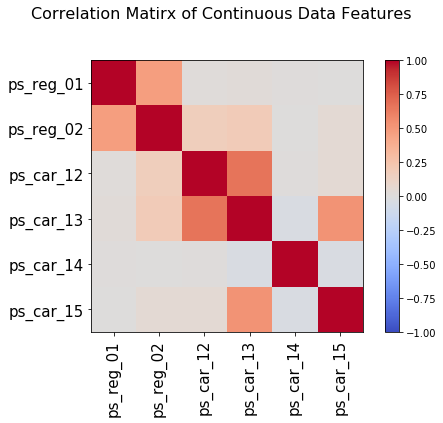

In [5]:
features_num = ['ps_reg_01','ps_reg_02','ps_car_12','ps_car_13','ps_car_14','ps_car_15']
#correlation matrix for continuous variables
correlations = data_no_calc[features_num].corr()
# plot correlation matrix
from matplotlib import cm
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111)
cax = ax.imshow(correlations, interpolation='nearest', cmap=cm.coolwarm, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(features_num),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(features_num, rotation=90, fontsize=15)
ax.set_yticklabels(features_num, fontsize=15)
fig.suptitle("Correlation Matirx of Continuous Data Features", \
            fontsize = 16, y = 1.03)
plt.show()

### Visualize Binary Features

11


C:\Users\mtian\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


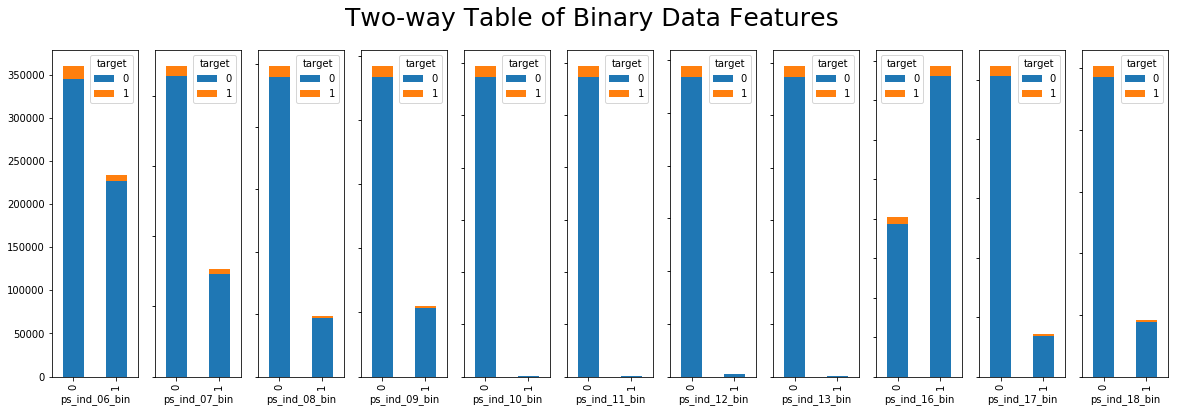

In [6]:
features_bin = [f for f in list(data_no_calc) if ('bin' in f)]
print len(list(features_bin))

fig = plt.figure(figsize = (20,6))
for i, feature in enumerate(features_bin):
    ax = fig.add_subplot(1,11,i+1)
    pd.crosstab(data_no_calc[feature], data_no_calc['target']).plot(kind='bar', stacked=True, sharey=True, ax=ax)
    
fig.suptitle("Two-way Table of Binary Data Features", fontsize = 25)
fig.show()

### Visualize Ordinary Features

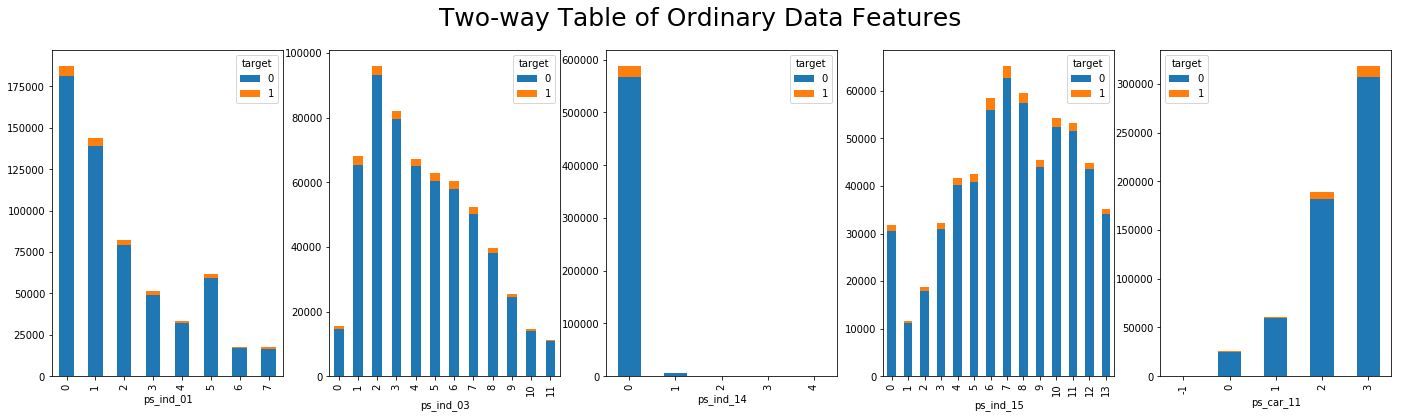

In [26]:
features_ord = ['ps_ind_01', 'ps_ind_03','ps_ind_14', 'ps_ind_15', 'ps_car_11']

fig = plt.figure(figsize = (24,6))
for i, feature in enumerate(features_ord):
    ax = fig.add_subplot(1,5,i+1)
    pd.crosstab(data_no_calc[feature], data_no_calc['target']).plot(kind='bar', stacked=True, ax=ax)
    
fig.suptitle("Two-way Table of Ordinary Data Features", fontsize = 25)
fig.show()

### One-Hot Transformation for Categorical Features

In [27]:
# subroutine courtesy of:
# https://github.com/lorenzoridolfi/reproduce_porto_winner_solution/blob/master/prepare_data.py
def hot_encoder(df, columns):
    one_hot = {c: list(df[c].unique()) for c in columns}
    for c in one_hot:
        for val in one_hot[c]:
            df[c+'_oh_' + str(val)] = (df[c].values == val).astype(np.int)
    return df

feature_cols = [c for c in data_no_calc.columns if c not in ['id','target']]
cat_cols     = [c for c in feature_cols if '_cat' in c]

df_all = hot_encoder(data_no_calc, cat_cols)
# print df_all.shape

In [9]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_all.drop(['id','target'], axis=1), 
                                    df_all['target'], test_size = 0.2, random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Training set has 476169 samples.
Testing set has 119043 samples.


### Evaluation of model behavior

In [1]:
def gini(actual, pred, cmpcol = 0, sortcol = 1):
     assert( len(actual) == len(pred) )
     all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
     all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
     totalLosses = all[:,0].sum()
     giniSum = all[:,0].cumsum().sum() / totalLosses
 
     giniSum -= (len(actual) + 1) / 2.
     return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

### Load Data

In [28]:
## save data
#np.save('X_train.npy',X_train)
#np.save('y_train.npy',y_train)
#np.save('X_test.npy',X_test)
#np.save('y_test.npy',y_test)

# #load data
# X_train = np.load("data/X_train.npy")
# y_train = np.load("data/y_train.npy")
# X_test = np.load("data/X_test.npy")
# y_test = np.load("data/y_test.npy")
# print('data loaded')

data loaded
(476169L, 212L) (476169L,)


## Benchmark Test

### Native Bayes

In [35]:
#Native Bayes
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict_proba(X_test)[:,1]

# Gini
gini_norm = gini_normalized(y_test, y_pred)
print 'gini coef for GaussianNB=', gini_norm

gini coef for GaussianNB= 0.185588654869


## Preliminary Tests
### sklearn library

In [10]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the regressors
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict_proba(X_test)[:,1]
# Gini
gini_norm = gini_normalized(y_test, y_pred)
print 'gini coef for DecisionTree=', gini_norm

gini coef for DecisionTree= 0.0201624613666


In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict_proba(X_test)[:,1]
# Gini
gini_norm = gini_normalized(y_test, y_pred)
print 'gini coef for K neighbors=', gini_norm

gini coef for K neighbors= 0.0405853503239


In [41]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# Gini
gini_norm = gini_normalized(y_test, y_pred)
print 'gini coef for LinearSVC=', gini_norm

gini coef for LinearSVC= 0.000202830655638


In [7]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict_proba(X_test)[:,1]
# Gini
gini_norm = gini_normalized(y_test, y_pred)
print 'gini coef for RandomForest=', gini_norm

gini coef for RandomForest= 0.00185846353035


In [8]:
from sklearn.ensemble import ExtraTreesRegressor
classifier = ExtraTreesRegressor()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# Gini
gini_norm = gini_normalized(y_test, y_pred)
print 'gini coef for ExtraTrees=', gini_norm

gini coef for ExtraTrees= 0.0738333468672


In [3]:
from sklearn.linear_model import ElasticNet
classifier = ElasticNet()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# Gini
gini_norm = gini_normalized(y_test, y_pred)
print 'gini coef for ElasticNet=', gini_norm

gini coef for ElasticNet= 0.000202830655638


### LightGBM

In [8]:
import lightgbm as lgb
lgb = lgb.LGBMClassifier()
print('Start training...')
lgb.fit(X_train, y_train)
print('Start predicting...')
y_pred = lgb.predict_proba(X_test)[:,1]

# Gini
gini_norm = gini_normalized(y_test, y_pred)
print 'gini coef for Lightgbm=', gini_norm

Start training...
Start predicting...
gini coef for Lightgbm= 0.276256921893


## Stacking

In [4]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

class ensemble(object):
    def __init__(self, n_splits, base_models):
        self.n_splits = n_splits
        self.base_models = base_models
        #self.stacker = stacker
        
    def train_predict(self, X_train, y_train, X_test):
    #generate folds    
        folds = list(StratifiedKFold(n_splits = self.n_splits, shuffle = True).split(X_train, y_train))
    #variables to store the inputs for stacker
        S_train = np.zeros((X_train.shape[0], len(self.base_models)))
        S_test = np.zeros((X_test.shape[0], len(self.base_models)))
    #train base models and generate stacker inputs    
        for i, model_ensemble in enumerate(self.base_models):
            S_test_i = np.zeros((X_test.shape[0], self.n_splits))
            for j, (idx_train, idx_test) in enumerate(folds):
                X_train_S = X_train[idx_train]
                y_train_S = y_train[idx_train]
                X_handout_S = X_train[idx_test]
    
                print('fitting base model {} for fold {}...'.format(i+1,j+1))
                model_ensemble.fit(X_train_S, y_train_S)
                y_handout_S = model_ensemble.predict_proba(X_handout_S)[:,1]
        
                S_train[idx_test, i] = y_handout_S
                S_test_i[:, j] = model_ensemble.predict_proba(X_test)[:,1]
        
            S_test[:, i] = S_test_i.mean(axis=1)
        self.S_train = S_train
        self.S_test = S_test
        print('finish ensemble...')

    def GridSearch_Stacker(self, y_train, stacker, stacker_params):
        print('fitting stacker using grid search...')
        grid_fit = GridSearchCV(stacker, stacker_params)
        grid_fit.fit(self.S_train, y_train)
        print('start stacker predicting...')            
        y_pred = grid_fit.predict_proba(self.S_test)[:,1]
        print('finish stacker predicting...')  
        return y_pred

In [17]:
# LightGBM params
lgb_params1 = {
    'learning_rate': 0.02,
    'n_estimators': 750,
    'max_bin': 10,    
    'metric': {'l2', 'auc'},
    'num_leaves': 50,
    'min_data_in_leaf': 1200,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 1,
    'lambda_l1': 1,
    'lambda_l2': 1,
    'random_state': 99
}

lgb_params2 = {
    'learning_rate': 0.02,
    'n_estimators': 1100,
    'max_bin': 10,    
    'metric': {'l2', 'auc'},
    'num_leaves': 50,
    'min_data_in_leaf': 1500,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 1,
    'lambda_l1': 1,
    'lambda_l2': 1,
    'random_state': 99
}

lgb_params3 = {
    'learning_rate': 0.02,
    'n_estimators': 800,
    'max_bin': 10,    
    'metric': {'l2', 'auc'},
    'num_leaves': 30,
    'min_data_in_leaf': 1500,
    'feature_fraction': 0.7,
    'bagging_fraction': 0.7,
    'bagging_freq': 1,
    'lambda_l1': 1,
    'lambda_l2': 1,
    'random_state': 99
}

lgb_params4 = {
    'learning_rate': 0.02,
    'n_estimators': 850,
    'max_bin': 10,    
    'metric': {'l2', 'auc'},
    'num_leaves': 16,
    'min_data_in_leaf': 1200,
    'feature_fraction': 0.7,
    'bagging_fraction': 0.7,
    'bagging_freq': 1,
    'lambda_l1': 1,
    'lambda_l2': 1,
    'random_state': 99
}

# define base models
lgb_1 = lgb.LGBMClassifier(**lgb_params1)
lgb_2 = lgb.LGBMClassifier(**lgb_params2)
lgb_3 = lgb.LGBMClassifier(**lgb_params3)
lgb_4 = lgb.LGBMClassifier(**lgb_params4)

# GNB = GaussianNB()
# DecisionTree = DecisionTreeClassifier()
# base_models = (lgb_1, GNB, DecisionTree)

# base_models = (lgb_1, lgb_2)
# base_models = (lgb_1, lgb_2, lgb_3)
base_models = (lgb_1, lgb_2, lgb_3, lgb_4)

# call stacking method
ensemb = ensemble(n_splits = 5, base_models = base_models)
ensemb.train_predict(X_train, y_train, X_test)

fitting base model 1 for fold 1...
fitting base model 1 for fold 2...
fitting base model 1 for fold 3...
fitting base model 1 for fold 4...
fitting base model 1 for fold 5...
fitting base model 2 for fold 1...
fitting base model 2 for fold 2...
fitting base model 2 for fold 3...
fitting base model 2 for fold 4...
fitting base model 2 for fold 5...
fitting base model 3 for fold 1...
fitting base model 3 for fold 2...
fitting base model 3 for fold 3...
fitting base model 3 for fold 4...
fitting base model 3 for fold 5...
fitting base model 4 for fold 1...
fitting base model 4 for fold 2...
fitting base model 4 for fold 3...
fitting base model 4 for fold 4...
fitting base model 4 for fold 5...
finish ensemble...


In [18]:
from sklearn.linear_model import LogisticRegression

stacker = LogisticRegression()
stacker_params = {'C': [0.8, 0.9, 1], 'max_iter':[100, 150, 200]}

y_pred = ensemb.GridSearch_Stacker(y_train, stacker, stacker_params)

# Gini
gini_norm = gini_normalized(y_test, y_pred)
print 'gini coef for Stacker=', gini_norm

fitting stacker using grid search...
start stacker predicting...
finish stacker predicting...
gini coef for Stacker= 0.284991102438
